In [1]:
import sklearn as s
s.__version__

'0.21.3'

In [2]:
!pip install scikit-learn==0.21.3

     |████████████████████████████████| 6.7MB 5.1MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [2]:
import sklearn as s
s.__version__

'0.21.3'

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
tf.__version__

'2.4.1'

In [5]:
keras.__version__

'2.4.0'

In [6]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [7]:
X_train_full.shape

(60000, 28, 28)

In [8]:
X_train_full.dtype

dtype('uint8')

In [9]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [10]:
class_names = ['T-shirt/top',"Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [11]:
y_train[0]

4

In [12]:
class_names[y_train[0]]

'Coat'

In [13]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.layers

In [16]:
hidden1 = model.layers[1]

In [17]:
hidden1.name

'dense'

In [18]:
model.get_layer("dense") is hidden1

True

In [19]:
weights,biases = hidden1.get_weights()
weights

array([[-0.05457088,  0.0319718 ,  0.0367476 , ..., -0.04081459,
        -0.00677052,  0.07353772],
       [-0.07229841,  0.01777589,  0.05662283, ..., -0.03456216,
         0.06335852,  0.07382195],
       [ 0.00253075, -0.06401822,  0.02107484, ..., -0.04108284,
        -0.0372709 ,  0.01640592],
       ...,
       [ 0.00402144, -0.04371849,  0.04514715, ...,  0.02100423,
         0.06601891, -0.0204355 ],
       [ 0.02522855, -0.07206877,  0.05593681, ..., -0.03174137,
        -0.06885195,  0.06161398],
       [ 0.01245089,  0.06628799, -0.01756227, ..., -0.01508306,
         0.04981176, -0.04468637]], dtype=float32)

In [20]:
weights.shape

(784, 300)

In [21]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [22]:
biases.shape

(300,)

In [23]:
model.compile(loss = "sparse_categorical_crossentropy",optimizer="sgd",metrics=['accuracy'])

In [24]:
history = model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.9746 - accuracy: 0.7000 - val_loss: 0.5373 - val_accuracy: 0.8058
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5043 - accuracy: 0.8240 - val_loss: 0.4813 - val_accuracy: 0.8304
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4509 - accuracy: 0.8438 - val_loss: 0.4350 - val_accuracy: 0.8490
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4278 - accuracy: 0.8494 - val_loss: 0.3935 - val_accuracy: 0.8614
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3955 - accuracy: 0.8619 - val_loss: 0.3875 - val_accuracy: 0.8662
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3821 - accuracy: 0.8634 - val_loss: 0.3764 - val_accuracy: 0.8706
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3620 - accuracy: 0.8724 - val_loss: 0.3637 - val_accuracy:

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

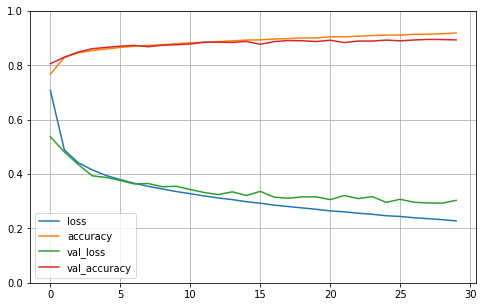

In [26]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [27]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 79.3401 - accuracy: 0.8317


[79.34012603759766, 0.8317000269889832]

In [28]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [29]:
y_pred = model.predict_classes(X_new)
y_pred

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1])

In [30]:
import numpy as np
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [31]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

In [32]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
housing = fetch_california_housing()

In [33]:
X_train_full,X_test,y_train_full,y_test = train_test_split(housing.data,housing.target)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [34]:
model  = keras.models.Sequential([keras.layers.Dense(30,activation="relu",input_shape=X_train.shape[1:]),keras.layers.Dense(1)])
model.compile(loss="mean_squared_error",optimizer="sgd")
history = model.fit(X_train,y_train,epochs = 20,validation_data=(X_valid,y_valid))
mse_test = model.evaluate(X_test,y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 3.0910 - val_loss: 2.2666
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.9891 - val_loss: 0.4201
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4125 - val_loss: 0.3918
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4173 - val_loss: 0.3774
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3679 - val_loss: 0.3669
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3573 - val_loss: 0.3636
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3502 - val_loss: 0.3650
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3598 - val_loss: 0.3534
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3548 - val_loss: 0.3569
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3462 - val_loss: 0.3564

In [35]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30,activation="relu")(input_)
hidden2 = keras.layers.Dense(30,activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_,hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs = [input_],outputs = [output])

In [36]:
input_A = keras.layers.Input(shape=[5],name="wide_input")
input_B = keras.layers.Input(shape=[6],name="deep_input")
hidden1 = keras.layers.Dense(30,activation="relu")(input_B)
hidden2 = keras.layers.Dense(30,activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A,hidden2])
output = keras.layers.Dense(1,name='output')(concat)
model = keras.Model(inputs = [input_A,input_B],outputs = [output])

In [37]:
model.compile(loss="mse",optimizer=keras.optimizers.SGD(lr=1e-3))
X_train_A,X_train_B = X_train[:,:5],X_train[:,2:]
X_valid_A,X_valid_B = X_valid[:,:5],X_valid[:,2:]
X_test_A,X_test_B = X_test[:,:5],X_test[:,2:]
X_new_A,X_new_B = X_test_A[:3],X_test_B[:3]
history = model.fit((X_train_A,X_train_B),y_train,epochs=20,validation_data=((X_valid_A,X_valid_B),y_valid))
mse_test = model.evaluate((X_test_A,X_test_B),y_test)
y_pred = model.predict((X_new_A,X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 3.6495 - val_loss: 0.8890
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8382 - val_loss: 0.7208
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6967 - val_loss: 0.6718
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6605 - val_loss: 0.6402
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6271 - val_loss: 0.6197
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6105 - val_loss: 0.6006
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6048 - val_loss: 0.5860
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5743 - val_loss: 0.5672
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5502 - val_loss: 0.5543
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5250 - val_loss: 0.5431

In [38]:
output = keras.layers.Dense(1,name="main_output")(concat)
aux_output = keras.layers.Dense(1,name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A,input_B],outputs=[output,aux_output])

In [39]:
model.compile(loss=["mse","mse"],loss_weights=[0.9,0.1],optimizer="sgd")
history = model.fit([X_train_A,X_train_B],[y_train,y_train],epochs=20,
                    validation_data=([X_valid_A,X_valid_B],[y_valid,y_valid]))

Epoch 1/20
363/363 [==============================] - 2s 2ms/step - loss: 1.3129 - main_output_loss: 1.1702 - aux_output_loss: 2.5970 - val_loss: 0.5465 - val_main_output_loss: 0.4800 - val_aux_output_loss: 1.1445
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5587 - main_output_loss: 0.4900 - aux_output_loss: 1.1766 - val_loss: 0.5051 - val_main_output_loss: 0.4480 - val_aux_output_loss: 1.0184
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5275 - main_output_loss: 0.4702 - aux_output_loss: 1.0432 - val_loss: 0.4880 - val_main_output_loss: 0.4404 - val_aux_output_loss: 0.9163
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4789 - main_output_loss: 0.4301 - aux_output_loss: 0.9184 - val_loss: 0.4687 - val_main_output_loss: 0.4270 - val_aux_output_loss: 0.8442
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4665 - main_output_loss: 0.4236 - aux_output_loss: 0.8519 - val_loss

In [40]:
total_loss,main_loss,aux_loss = model.evaluate([X_test_A,X_test_B],[y_test,y_test])

162/162 [==============================] - 0s 1ms/step - loss: 0.3579 - main_output_loss: 0.3445 - aux_output_loss: 0.4789


In [41]:
y_pred_main,y_pred_aux = model.predict([X_new_A,X_new_B])